### Code to test an already existing model on unseen data and to print the performance metrics and confusion matrix

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataset
data_path = "/content/drive/My Drive/ISL_Datasets/rotated_right_handed_landmarks 18th Jan.csv" #Path to standardized dataset
data = pd.read_csv(data_path)

In [5]:
data.head()

,Alphabet,left_x1,left_y1,left_x2,left_y2,left_x3,left_y3,left_x4,left_y4,left_x5,...,left_x75,left_x76,left_x77,left_x78,left_x79,left_x80,left_x81,left_x82,left_x83,left_x84
0,A,0.712766,0.054965,0.489362,-0.267730,0.368794,-0.544326,0.273050,-0.739362,0.170213,...,-0.560284,-0.377660,-0.971631,-0.480496,-0.748227,-0.484043,-0.652482,-0.395390,-0.670213,-0.356383
1,A,0.706619,0.069767,0.488372,-0.262970,0.377460,-0.542039,0.288014,-0.742397,0.173524,...,-0.552773,-0.395349,-0.974955,-0.491950,-0.771020,-0.509839,-0.660107,-0.434705,-0.649374,-0.395349
2,A,0.706294,0.085664,0.489510,-0.253497,0.377622,-0.526224,0.293706,-0.718531,0.185315,...,-0.531469,-0.417832,-0.926573,-0.515734,-0.720280,-0.515734,-0.622378,-0.438811,-0.625874,-0.403846
3,A,0.715789,-0.059649,0.431579,-0.347368,0.270175,-0.596491,0.150877,-0.764912,0.010526,...,-0.582456,-0.280702,-1.000000,-0.308772,-0.803509,-0.340351,-0.698246,-0.284211,-0.698246,-0.259649
4,A,0.661538,-0.059829,0.377778,-0.340171,0.223932,-0.586325,0.104274,-0.747009,-0.035897,...,-0.617094,-0.251282,-1.000000,-0.285470,-0.811966,-0.326496,-0.709402,-0.261538,-0.726496,-0.227350


In [18]:
# Separate features and labels (Assuming first column is the label)
X = np.array(data.iloc[:, 1:])
Y = np.array(data.iloc[:, 0])

In [19]:
print(X.shape)
print(Y.shape)

(812, 84)
(812,)


In [33]:
print(len(Y))

812


In [23]:
# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify = Y, random_state=42) # Amogh : add stratify = y for data stratification

In [24]:
# Custom converter function to convert characters to ASCII values
# retuns a list of encoded capital alphabets
def char_to_ascii(alphabets):
   return [(ord(char) - ord('A')) for char in alphabets]  # Convert character to ASCII value
    #if 0 <= ascii_val <= 25:  # Ensure ASCII value is within range
     #   return ascii_val
    #else:
     #   raise ValueError("Character '{}' is out of range (A-Z)".format(char))

In [25]:
# Convert the alphabet labels into numeric values by calling the char_to_ascii function
y_test = np.array(char_to_ascii(Y_test))

In [34]:
print(len(y_test))

163


In [27]:
# Load the existing model
model_path = "/content/drive/My Drive/ISL_Models/keypoint_classifier_19th_Jan.h5"  # Update if the model path is different
model = load_model(model_path)

In [28]:
print(X_test[0])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.19953596 -0.0487239   0.38515081 -0.15545244
  0.55684455 -0.2412993   0.70533643 -0.24825986  0.29466357 -0.48259861
  0.32482599 -0.72389791  0.34570766 -0.86774942  0.35266821 -1.
  0.16473318 -0.48955917  0.19025522 -0.57308585  0.19953596 -0.37354988
  0.19721578 -0.26450116  0.0324826  -0.45011601  0.05336427 -0.50580046
  0.08816705 -0.32714617  0.09976798 -0.23201856 -0.08584687 -0.38051044
 -0.06728538 -0.43387471 -0.01392111 -0.31090487  0.0162413  -0.23665893]


In [13]:
predictions = []

for ind in range(25):
  predicted_class = np.argmax(model.predict(np.array([X_test[ind]])))
  predictions.append(chr(predicted_class + 65))
  print(f"Predicted Class: {chr(predicted_class+65)}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Class: A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: A

1/1 ━━━━━━━━━

In [ ]:
print(predictions)

['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


In [ ]:
data.loc[:, -1] = np.array(predictions)

In [ ]:
data

,0.07560781,0.7692847,-0.14037722,0.41401428,-0.35656565,0.2161611,-0.5135937,0.11344415,-0.65877986,0.005874646,...,-0.644,-0.14308098,-1.166183,-0.007923503,-0.89431655,0.04424753,-0.7978053,0.030006792,-0.82379794,-1
0,-0.017193,1.000000,-0.055619,0.681654,-0.160946,0.454489,-0.224414,0.282794,-0.246510,0.103725,...,-0.007401,-0.381356,-0.762823,-0.411024,-0.479665,-0.392000,-0.290116,-0.358780,-0.141569,U
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.436547,-0.393811,0.239738,-0.314184,0.514661,-0.238460,0.460353,-0.231342,0.365752,Q
2,0.311531,1.000000,0.173497,0.528876,0.030266,0.289090,-0.061240,0.092384,-0.161932,-0.059427,...,-0.481836,-0.848329,-0.878656,-0.812127,-0.542693,-0.683700,-0.483722,-0.617211,-0.515600,W
3,0.053150,0.987204,-0.000859,0.732201,-0.094359,0.492478,-0.122922,0.285699,-0.100874,0.111693,...,-0.526771,-0.204896,-0.743476,-0.070869,-0.491934,0.008798,-0.443313,0.053217,-0.424924,U
4,0.714972,1.000000,0.373749,0.799411,0.247674,0.420996,0.309948,0.095075,0.418730,-0.050283,...,-0.723701,-0.340198,-0.922948,-0.045755,-0.873757,-0.112402,-0.907315,-0.220876,-0.904305,Z
5,0.324836,1.000000,0.002000,0.646733,-0.117511,0.249515,-0.082509,-0.111291,-0.004563,-0.300904,...,0.073889,-0.228546,-0.289136,-0.249991,0.185650,-0.254588,0.177126,-0.261133,0.088108,W
6,0.277383,1.000000,-0.105099,0.732810,-0.382019,0.217043,-0.587576,-0.074747,-0.785260,-0.071357,...,-1.035811,-0.832257,-1.195449,-1.033496,-1.247649,-1.161358,-1.278152,-1.282647,-1.308400,K
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.463401,-0.246772,0.108474,-0.080395,0.515280,0.009873,0.487935,0.005094,0.381995,Q
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.326848,-0.248290,0.021804,-0.089564,0.317203,-0.056097,0.300607,-0.086808,0.237859,Q
9,0.493598,1.000000,0.367616,0.727414,0.307567,0.444750,0.295384,0.178522,0.279550,0.030665,...,-0.573090,-0.276812,-0.535390,-0.036251,-0.511772,0.066673,-0.527235,0.110368,-0.573594,W


In [ ]:
data.to_csv("App_Hand_Landmarks_Predictions_20th_Feb.csv", index=False)

In [29]:
predictions = model.predict(X_test)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {predicted_class}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: [11  0  5  0  8  2  3  0 11  1  3 19  5  2 16 13  3 17 19  2 10 11 11 13
  8 17  2 19 18  2  0 12 25  8  5  8 10 14 15 18 14  6  8 16 21 20  2 11
 15 22 21 23 18 12 12 12 16 13 21  3 15  3 11  2  1 12  6  3 14 19  0 22
  5 11 10  0  0 22  5 16 10  6 20  1 10 14 22  6 10 16 10 17  1 15 20  8
  6 20 10  5 14  8 16  8  1 20 12 18 23 10 11 15  6 18  6  2 23 20 21 10
 16  2 25 25 25  0  6 13  8 11 14  0 17 22  8  2  5 23 17 13  1 22  1  3
  6 18 23  1 21 12  0 17  1  3 25  3 19 13  5 15 23 25  1]


In [30]:
# Model evaluation

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9950 - loss: 0.0563 


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


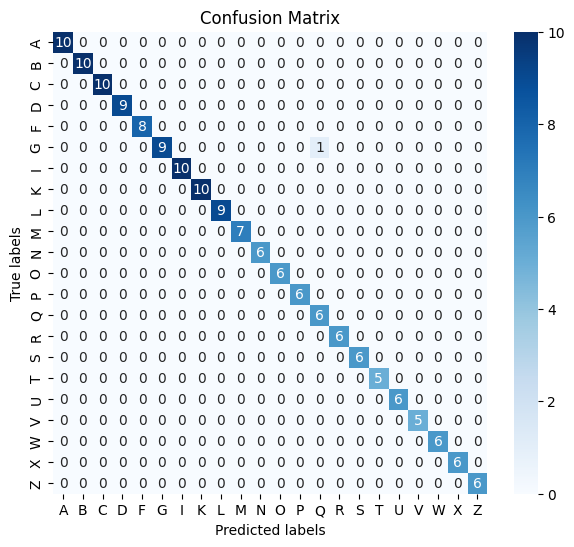

Classification Report
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        10
           B       1.00      1.00      1.00        10
           C       1.00      1.00      1.00        10
           D       1.00      1.00      1.00         9
           F       1.00      1.00      1.00         8
           G       1.00      0.90      0.95        10
           I       1.00      1.00      1.00        10
           K       1.00      1.00      1.00        10
           L       1.00      1.00      1.00         9
           M       1.00      1.00      1.00         7
           N       1.00      1.00      1.00         6
           O       1.00      1.00      1.00         6
           P       1.00      1.00      1.00         6
           Q       0.86      1.00      0.92         6
           R       1.00      1.00      1.00         6
           S       1.00      1.00      1.00         6
           T       1.00      1.00      1.00         5
     

In [31]:
# Load dataset
# Define the print_confusion_matrix function
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', cmap='Blues', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))


predicted_probabilities = model.predict(X_test)
y_pred = np.argmax(predicted_probabilities, axis=1)

# Convert integer class labels to characters
y_test_chars = [chr(label + ord('A')) for label in y_test]
y_pred_chars = [chr(label + ord('A')) for label in y_pred]

# Print confusion matrix and classification report
print_confusion_matrix(y_test_chars, y_pred_chars)


In [32]:
# Print results
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Evaluation Metrics:


NameError: name 'accuracy' is not defined